In [4]:
import nltk
import pandas as pd
import numpy as np

In [9]:
# Load the data
data = pd.read_csv('../data/raw/spam.csv', encoding='windows-1252')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
# Drop the columns that are not needed
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Rename the columns
data.columns = ['IsSpam', 'Message']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   IsSpam   5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
# Change the IsSpam column to a boolean (0 for ham, 1 for spam)
data['IsSpam'] = data['IsSpam'].map({'ham': 0, 'spam': 1})
data.head()

,IsSpam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Check for missing values
data.isnull().sum()

IsSpam     0
Message    0
dtype: int64

In [17]:
import matplotlib.pyplot as plt

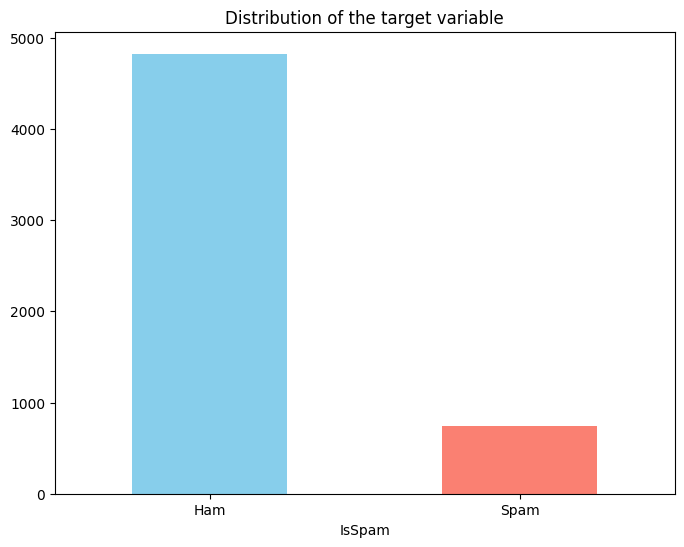

In [20]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
data['IsSpam'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of the target variable')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'], rotation=0)
plt.show()

In [23]:
from wordcloud import WordCloud

In [27]:
# Create a word cloud for the spam messages
spam_messages = data[data['IsSpam'] == 1]['Message']
ham_messages = data[data['IsSpam'] == 0]['Message']

# Create a list of words for each category
spam_words = ' '.join(spam_messages)
ham_words = ' '.join(ham_messages)

# Create the WordClouds objects for each category
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)


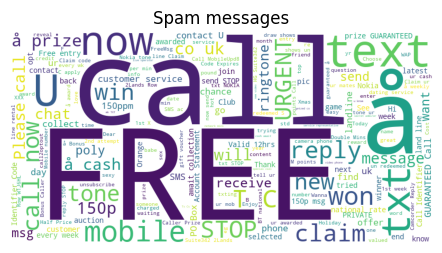

In [28]:
# Plot the Spam WordClouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud)
plt.title('Spam messages')
plt.axis('off')
plt.show()

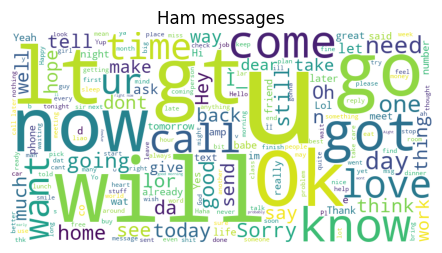

In [29]:
# Plot the Ham WordClouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud)
plt.title('Ham messages')
plt.axis('off')
plt.show()

In [30]:
'''Histogram of Message Lengths: This could help you understand if spam and non-spam messages typically have different lengths.'''

'Histogram of Message Lengths: This could help you understand if spam and non-spam messages typically have different lengths.'

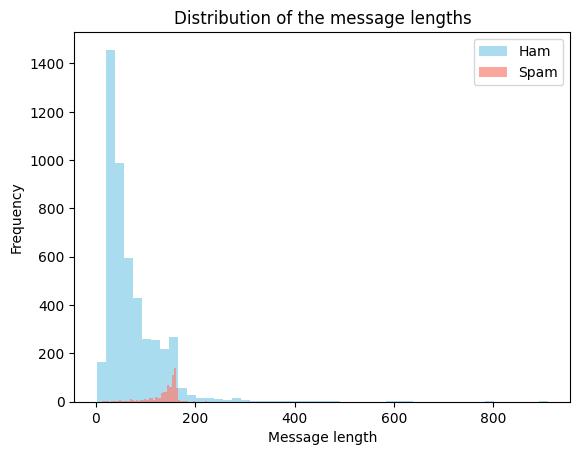

In [31]:
# Create a new column with the length of the messages
data['MessageLength'] = data['Message'].apply(len)

# Plot the distribution of the message lengths
plt.hist(data[data['IsSpam'] == 0]['MessageLength'], bins=50, color='skyblue', label='Ham', alpha=0.7)
plt.hist(data[data['IsSpam'] == 1]['MessageLength'], bins=50, color='salmon', label='Spam', alpha=0.7)
plt.title('Distribution of the message lengths')
plt.xlabel('Message length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [33]:
'''Word Frequency: This could help you understand which words are most common in spam messages.'''

'Word Frequency: This could help you understand which words are most common in spam messages.'

In [37]:
# Most common words in spam messages 
spam_messages = data[data['IsSpam'] == 1]['Message']
spam_words = ' '.join(spam_messages).split()
spam_words_freq = pd.Series(spam_words).value_counts()

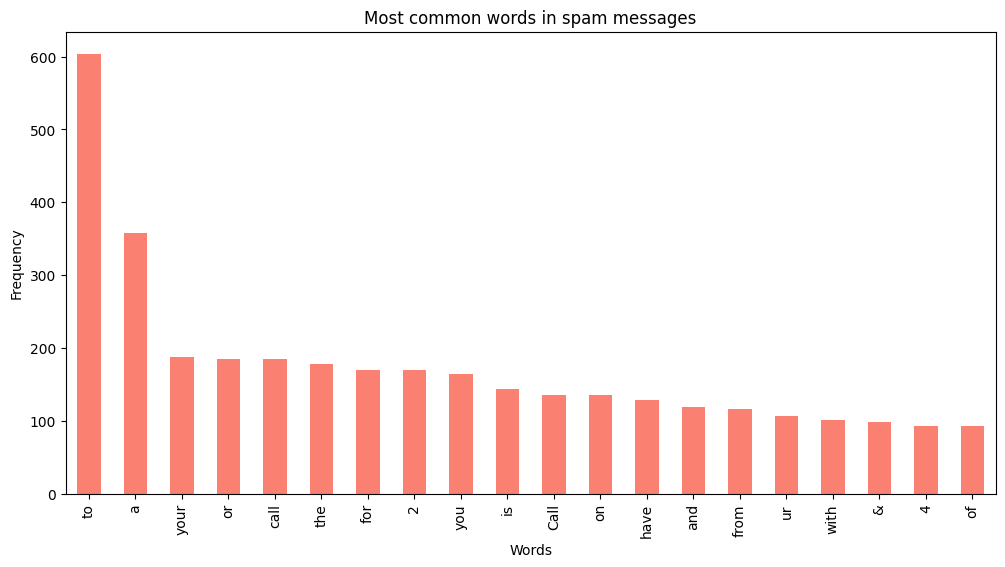

In [38]:
# Create a plot for the most common words in spam messages
plt.figure(figsize=(12, 6))
spam_words_freq[:20].plot(kind='bar', color='salmon')
plt.title('Most common words in spam messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [39]:
'''THE ISSUES IS MOST OF THE WORDS ARE STOPWORDS'''

'THE ISSUES IS MOST OF THE WORDS ARE STOPWORDS'

In [44]:
# Remove the stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruiz.igor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruiz.igor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
# Remove the stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [61]:
# Tokenize the spam messages apply to lower becasue call == Call
spam_messages = data[data['IsSpam'] == 1]['Message']
spam_messages = spam_messages.str.lower()
spam_words = ' '.join(spam_messages)
spam_word_tokens = word_tokenize(spam_words)

# Remove all the signs and numbers
spam_words = [word for word in spam_word_tokens if word.isalpha()]

# Filter the stopwords
filter_spam_words = [word for word in spam_words if word.lower() not in stopwords.words('english')]

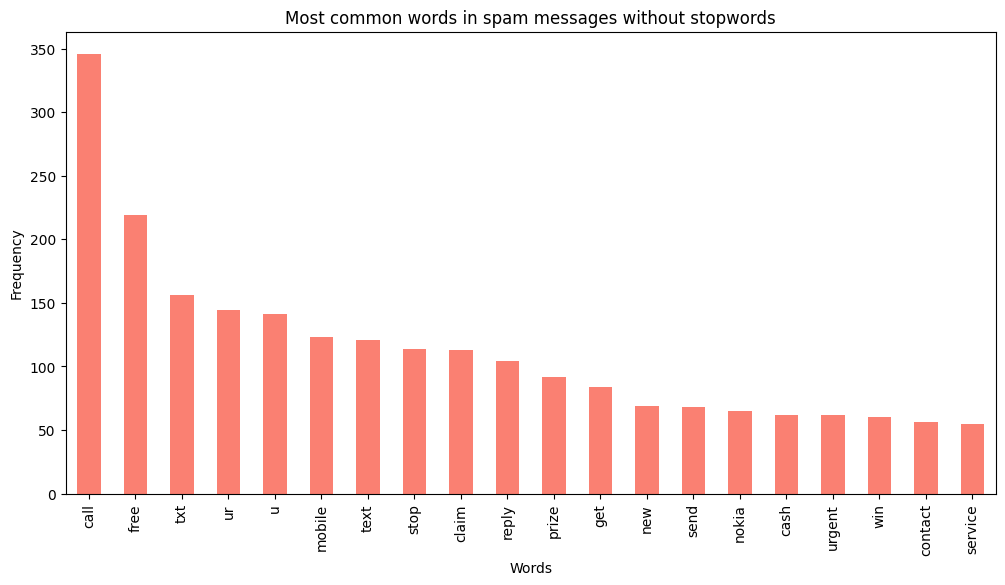

In [62]:
# Create a frequency distribution of the filtered words
spam_words_freq = pd.Series(filter_spam_words).value_counts()

# Create a plot for the most common words in spam messages
plt.figure(figsize=(12, 6))
spam_words_freq[:20].plot(kind='bar', color='salmon')
plt.title('Most common words in spam messages without stopwords')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [57]:
'''As we see the word 'call' is the most common word in spam messages. Also, the word 'free' is very common in spam messages.'''

"As we see the word 'call' is the most common word in spam messages. Also, the word 'free' is very common in spam messages."

In [66]:
# Most common words in ham messages
ham_messages = data[data['IsSpam'] == 0]['Message']
ham_messages = ham_messages.str.lower()
ham_words = ' '.join(ham_messages)
ham_word_tokens = word_tokenize(ham_words)

# Remove all the signs and numbers
ham_words = [word for word in ham_word_tokens if word.isalpha()]

# Remove the stopwords
filter_ham_words = [word for word in ham_words if word.lower() not in stopwords.words('english')]

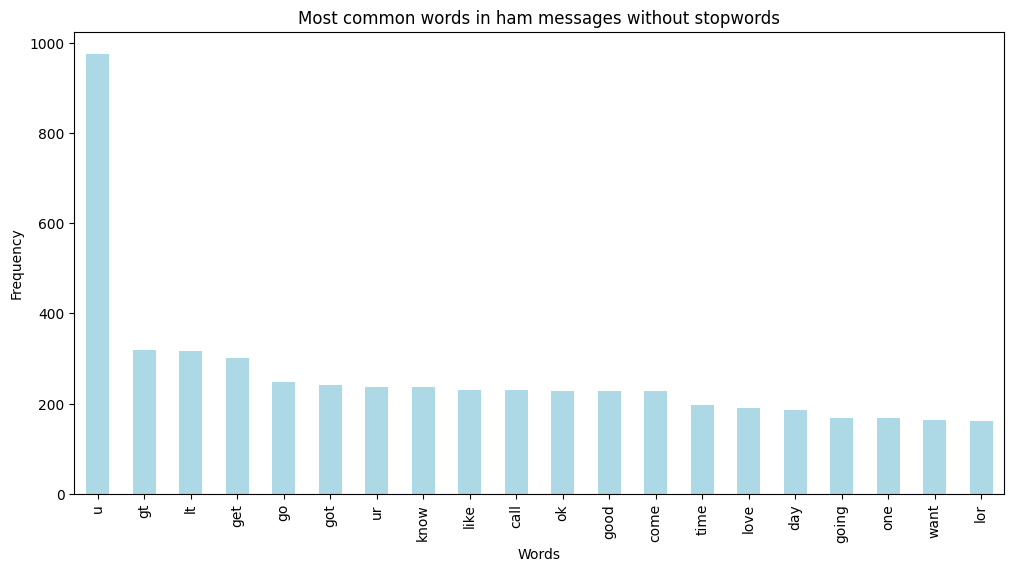

In [69]:
# Create a frequency distribution of the filtered words
ham_words_freq = pd.Series(filter_ham_words).value_counts()

# Create a plot for the most common words in ham messages
plt.figure(figsize=(12, 6))
ham_words_freq[:20].plot(kind='bar', color='lightblue', label='Ham')
plt.title('Most common words in ham messages without stopwords')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
'''The word 'u' is the most common word in ham messages. The rest has a very similiar frequency.'''